In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [3]:
import pandas as pd

In [18]:
# mnist=keras.datasets.mnist
# (xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [4]:
train_data = pd.read_csv('Dataset/mnist_train.csv')
xtrain = train_data.drop('label', axis=1).values
ytrain = train_data['label'].values

# Load testing data from CSV
test_data = pd.read_csv('Dataset/mnist_test.csv')
xtest = test_data.drop('label', axis=1).values
ytest = test_data['label'].values

# Reshape data to 28x28 images
xtrain = xtrain.reshape(-1, 28, 28)
xtest = xtest.reshape(-1, 28, 28)

# Normalize pixel values to be between 0 and 1
xtrain = xtrain / 255.0
xtest = xtest / 255.0

In [5]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=11)

Epoch 1/11
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6478 - accuracy: 0.8397 - val_loss: 0.3541 - val_accuracy: 0.9030
Epoch 2/11
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3335 - accuracy: 0.9070 - val_loss: 0.2894 - val_accuracy: 0.9181
Epoch 3/11
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2849 - accuracy: 0.9199 - val_loss: 0.2576 - val_accuracy: 0.9265
Epoch 4/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2539 - accuracy: 0.9290 - val_loss: 0.2352 - val_accuracy: 0.9324
Epoch 5/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2307 - accuracy: 0.9355 - val_loss: 0.2166 - val_accuracy: 0.9377
Epoch 6/11
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2122 - accuracy: 0.9412 - val_loss: 0.1994 - val_accuracy: 0.9431
Epoch 7/11
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1970 - accuracy: 0.9456 - val_loss: 0.1872 - val_accuracy

In [7]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print("Loss = %.3f"%test_loss)
print("Acc = %.3f"%test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1531 - accuracy: 0.9552
Loss = 0.153
Acc = 0.955


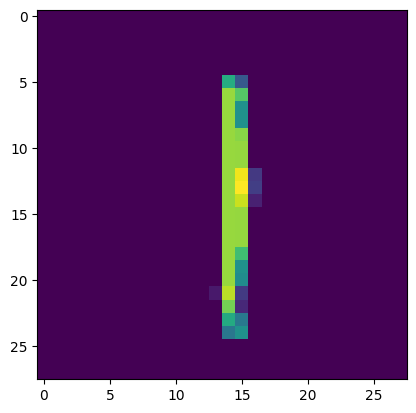

In [8]:
n=random.randint(0,9999)
plt.imshow(xtest[n])
plt.show()

In [9]:
predicted_value=model.predict(xtest)
import numpy as np
print("Target Value: ",ytest[n])
print("Predicted Value: ",np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 3ms/step
Target Value:  1
Predicted Value:  1


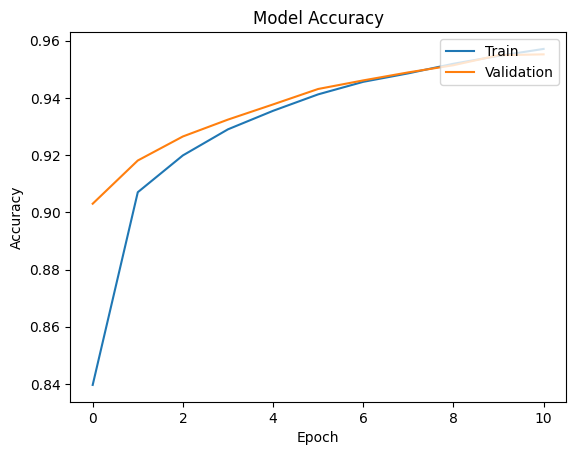

In [10]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train","Validation"],loc="upper right")
plt.show()

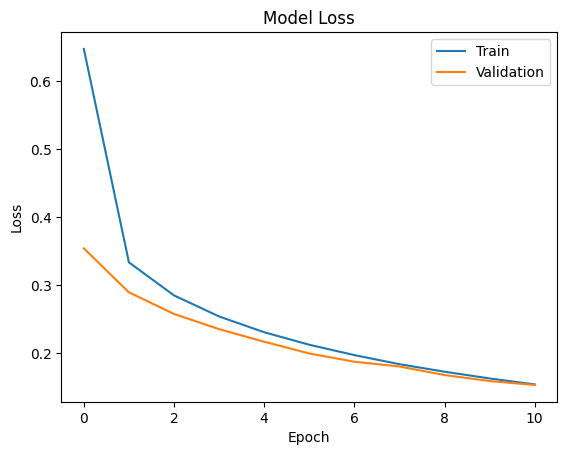

In [11]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train","Validation"],loc="upper right")
plt.show()